In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format
warnings.simplefilter(action='ignore', category=Warning)

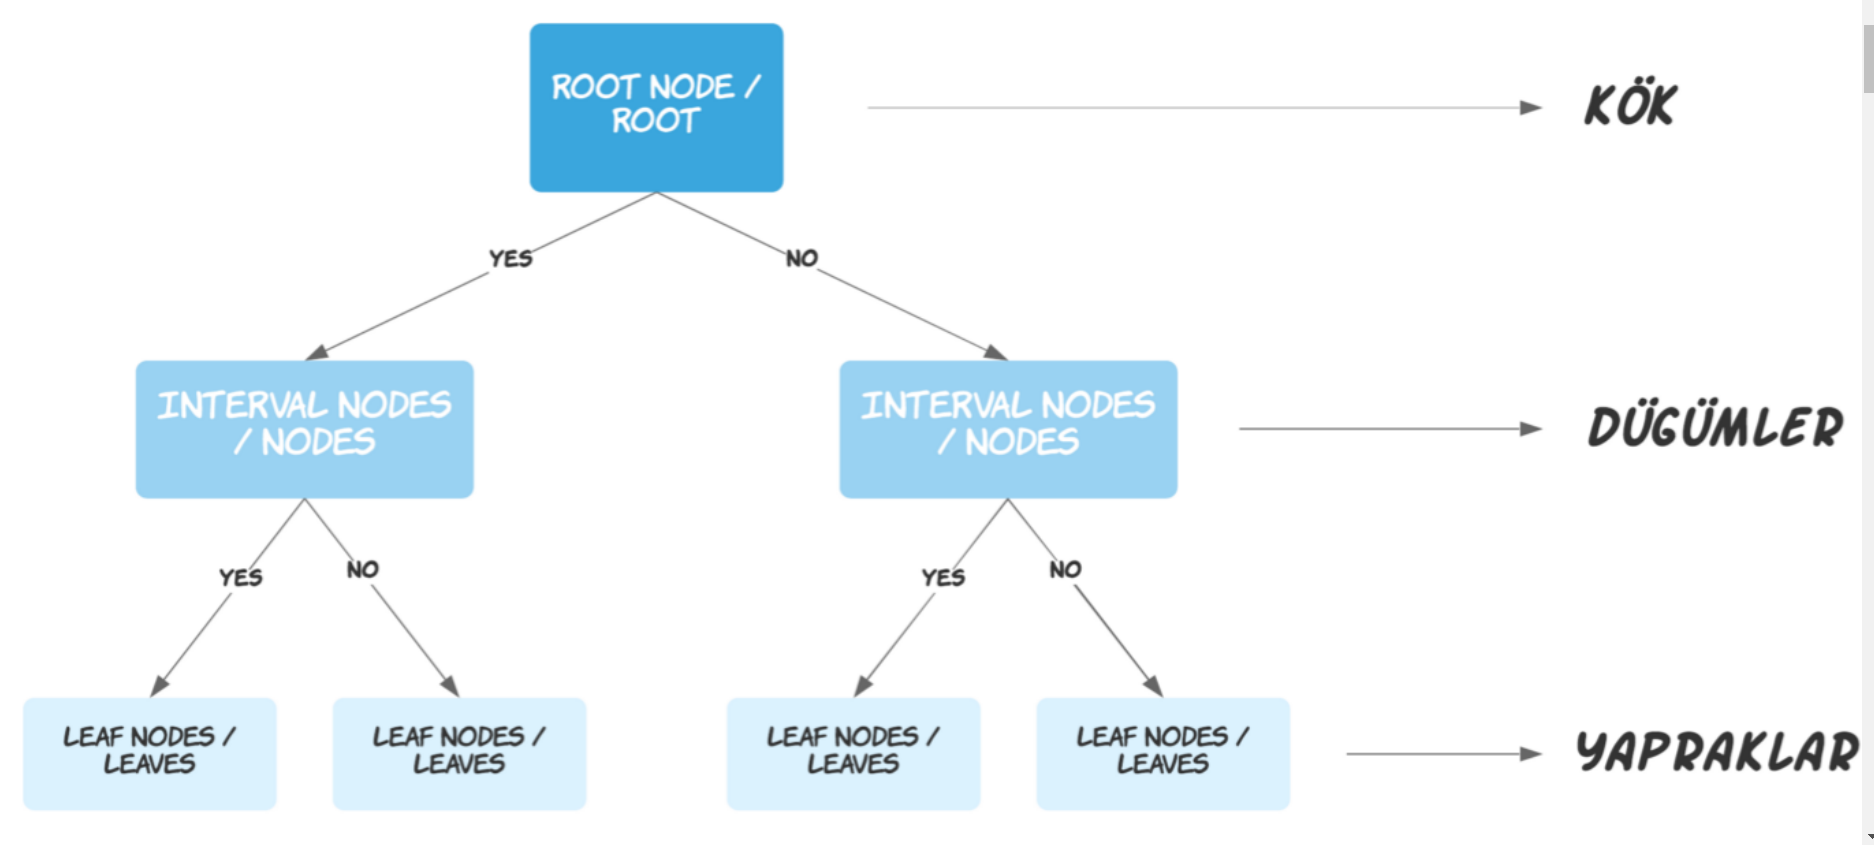

## min_samples_leaf, min_samples_split değeri ne olursa olsun her yaprakta minimum sayıda örneği garanti eder.

## regresyon problemleri için : 

## SSE :108308(SUM OF SQUARED ERROR) 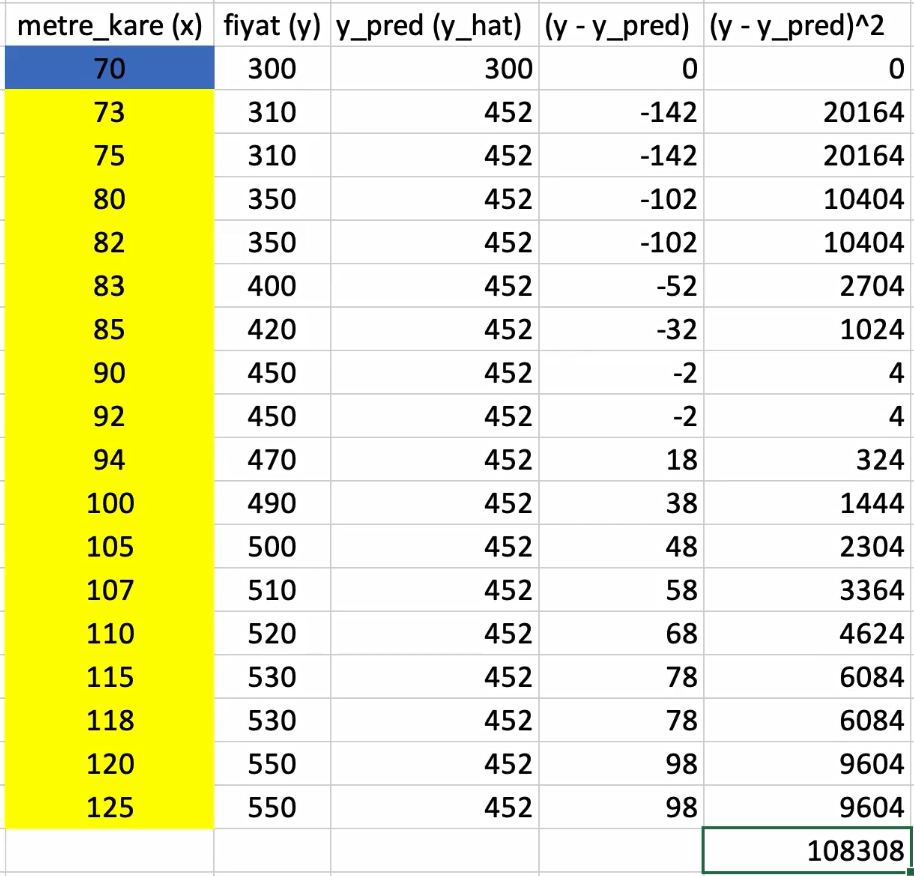

y_pred -------> aslında ortalamadır. 
## bölme noktaları değiştikçe hatam değişiyor ve bende buna göre nereden böleceğime karar vereceğim.

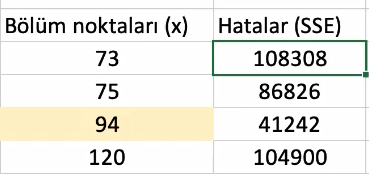

## en düşük SSE 94'ten bölününce alındığına göre buradan bölmeliyiz diyoruz.

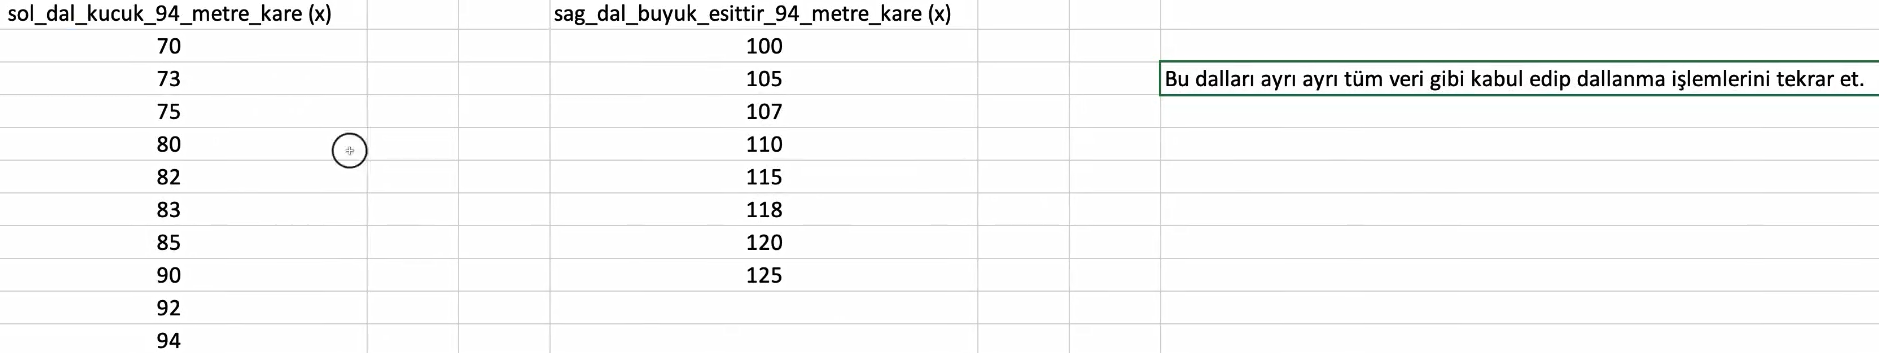

### Regresyon problemleri için, bölmeleri seçmek için varyansı kullanırız ve bölme noktasının her iki tarafındaki varyansları hesaplarız. Karar ağacı, yaprakların varyansını mümkün olduğunca en aza indirmeye çalışır.(pre-class)

### sınıflandırma problemleri için :  gini katsayısı veya entropiye göre dallandırmaları yapacağız: 

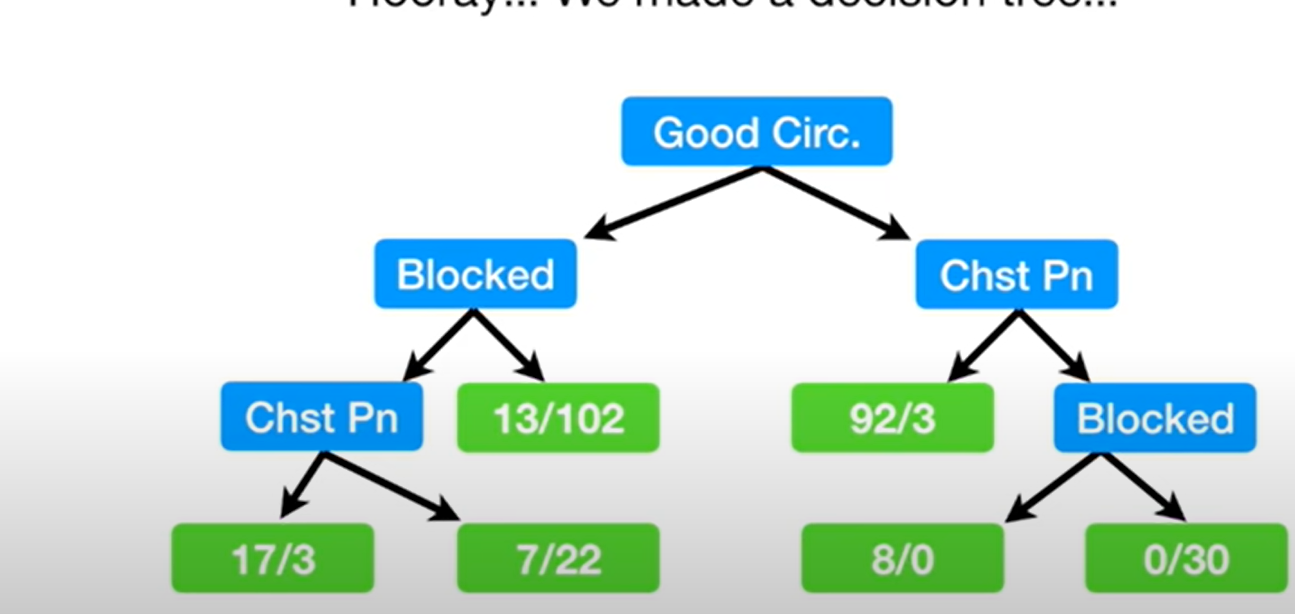

In [2]:
# pip install pydotplus

In [3]:
# pip install skompiler

In [4]:
# pip install astor

In [5]:
# pip install joblib

In [6]:
# pip install graphviz

In [7]:
import warnings
import joblib
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from skompiler import skompile
import graphviz

In [8]:
warnings.simplefilter(action='ignore', category=Warning)

            # 1. Exploratory Data Analysis
            # 2. Data Preprocessing & Feature Engineering
            # 3. Modeling using CART
            # 4. Hyperparameter Optimization with GridSearchCV
            # 5. Final Model
            # 6. Feature Importance
            # 7. Analyzing Model Complexity with Learning Curves 
            # 8. Visualizing the Decision Tree
            # 9. Extracting Decision Rules
            # 10. Extracting Python/SQL/Excel Codes of Decision Rules
            # 11. Prediction using Python Codes
            # 12. Saving and Loading Model


## skompile ------> sql / excell formunda çıktılar veriyor.

In [9]:
# !pip install plotly

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [12]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45,stratify=y)

In [15]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (537, 8)
Train target shape   :  (537,)
Test features shape  :  (231, 8)
Test target shape    :  (231,)


In [16]:
cart_model = DecisionTreeClassifier(random_state=45)
cart_model

DecisionTreeClassifier(random_state=45)

In [17]:
cart_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=45)

In [18]:
# Confusion matrix için y_pred:
y_pred = cart_model.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [19]:
# AUC için y_prob:
y_prob = cart_model.predict_proba(X_test)[:, 1]
y_prob

array([1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1.

In [20]:
from sklearn.metrics import plot_confusion_matrix

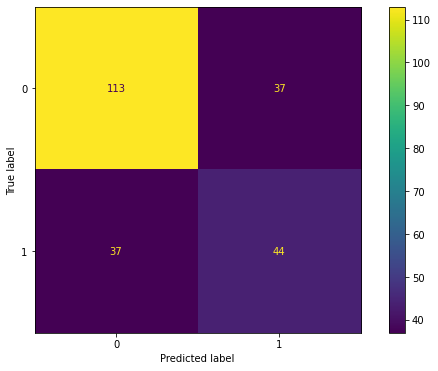

In [21]:
#confusion_matrix
plot_confusion_matrix(cart_model,X_test,y_test)

In [22]:
# clasification_report
print(classification_report(y_test, y_pred,target_names=["no-diabet","diabet"]))

              precision    recall  f1-score   support

   no-diabet       0.75      0.75      0.75       150
      diabet       0.54      0.54      0.54        81

    accuracy                           0.68       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.68      0.68      0.68       231



In [23]:
# AUC
roc_auc_score(y_test, y_prob)

0.6482716049382716

## train için:

In [24]:
y_pred_train = cart_model.predict(X_train)

In [25]:
y_prob_train = cart_model.predict_proba(X_train)[:, 1]

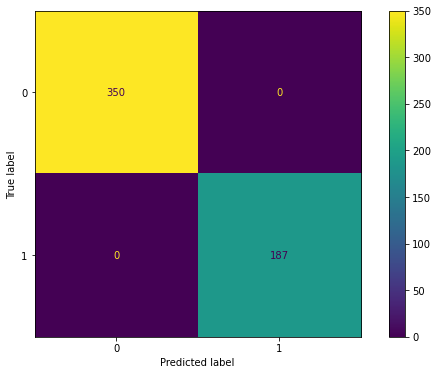

In [26]:
#confusion_matrix
plot_confusion_matrix(cart_model,X_train,y_train)

In [27]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



In [28]:
roc_auc_score(y_train, y_prob_train)

1.0

## traindeki başarım % 100 peki testte : 

In [29]:
print(classification_report(y_test, y_pred,target_names=["no-diabet","diabet"]))

              precision    recall  f1-score   support

   no-diabet       0.75      0.75      0.75       150
      diabet       0.54      0.54      0.54        81

    accuracy                           0.68       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.68      0.68      0.68       231



In [30]:
roc_auc_score(y_test, y_prob)

0.6482716049382716

## model göremediği veride kötü bizim modelimiz ----------> overfitting durumunda.

# CV ile Başarı Değerlendirme

In [31]:
from sklearn.model_selection import cross_validate

In [32]:
cart_cv = DecisionTreeClassifier()

scores = cross_validate(cart_cv, X_train, y_train, scoring = ['precision','recall','f1','accuracy',"roc_auc"], cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy,test_roc_auc
1,0.007,0.012,0.655,0.500,0.567,0.731,0.679
2,0.006,0.006,0.633,0.500,0.559,0.722,0.671
3,0.003,0.004,0.581,0.486,0.529,0.701,0.650
4,0.002,0.004,0.590,0.622,0.605,0.720,0.697
5,0.003,0.003,0.526,0.541,0.533,0.673,0.642


In [33]:
df_scores.mean()[2:]  

test_precision   0.597
test_recall      0.530
test_f1          0.559
test_accuracy    0.709
test_roc_auc     0.668
dtype: float64

## modelimizin gerçek skoru bu ,doğru skor bu.ve skorlar düşük model başarımızı nasıl artırabiliriz : 
### --------> hyperparametreler ile oynayarak,
### ----------> yeni datalar ekleriz 
### -----------> feature enginering
### -----------> encoder işlemi de yapabiliriz (tree based) 

## OrdinalEncoder and Categoric Variable

In [34]:
cat = X_train.select_dtypes("object").columns
cat

Index([], dtype='object')

In [35]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


###  Hyperparameter Optimization with GridSearchCV

In [37]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 45,
 'splitter': 'best'}

In [38]:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

In [39]:
cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=1)

In [40]:
cart_best_grid.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=45), n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(2, 20)},
             verbose=1)

In [41]:
cart_best_grid.best_params_

{'max_depth': 5, 'min_samples_split': 6}

In [42]:
cart_best_grid.best_score_               

0.7578746971270336

 # ---------> bu accuracy skordur çünkü defaultu bu bize accuracy skoruna göre en iyi hyperparametre kombinini getirdi ben yukarıda gridsearchcv'de scoring parametresine hangi skoru yazarsam onu maximize edecek şekilde bana hyperparametreleri getirir.

## cart_best_grid artık bizim modelimiz bunun üzerinden tahminler yapabiliriz yeniden bir model oluşturup gridsearchcvden gelen hyperparametreleri yazıp tekrara düşmeye gerek yoktur.

In [43]:
random = X.sample(1, random_state=45)
random

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
195,5,158,84,41,210,39.400,0.395,29


In [44]:
cart_best_grid.predict(random)

array([1], dtype=int64)

## final model kurmak ama bizim için önemli ; tüm x ve y ile yapıyoruz çünkü.

In [45]:
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_, random_state=17)

 
### böyle de yapailirdik.

In [46]:
cart_final.fit(X, y)

DecisionTreeClassifier(max_depth=5, min_samples_split=6, random_state=17)

In [48]:
cv_results = cross_validate(cart_final,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])
df_scores = pd.DataFrame(cv_results, index = range(1, 6))
df_scores

,fit_time,score_time,test_accuracy,test_f1,test_roc_auc
1,0.006,0.009,0.747,0.598,0.815
2,0.004,0.008,0.688,0.556,0.723
3,0.006,0.006,0.753,0.596,0.805
4,0.005,0.005,0.791,0.692,0.832
5,0.003,0.004,0.771,0.632,0.805


In [49]:
df_scores.mean()[2:]  

test_accuracy   0.750
test_f1         0.615
test_roc_auc    0.796
dtype: float64

## hyperparametre ile sonuçlarımız iyileşmiş oldu.

# Feature Importance

In [50]:
cart_final.feature_importances_

array([0.01139589, 0.49879295, 0.04237811, 0.        , 0.01510703,
       0.22415144, 0.06879392, 0.13938066])

In [54]:
df_f_i = pd.DataFrame(data = cart_final.feature_importances_, index=cart_final.feature_names_in_, #index=X.columns
                      columns = ["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_f_i

,Feature Importance
Glucose,0.499
BMI,0.224
Age,0.139
DiabetesPedigreeFunction,0.069
BloodPressure,0.042
Insulin,0.015
Pregnancies,0.011
SkinThickness,0.000


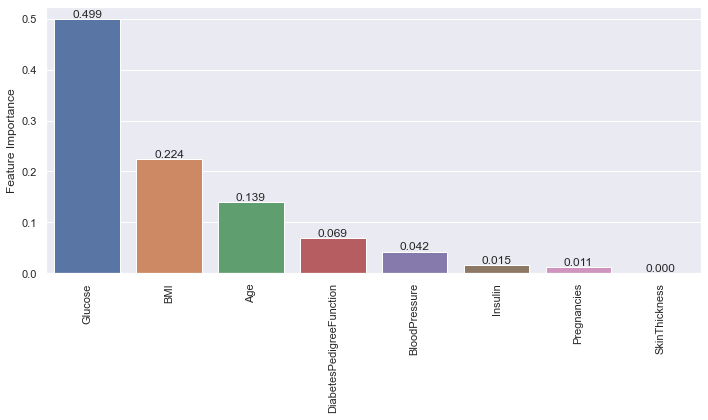

In [55]:
ax = sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation = 90)
plt.tight_layout()

## diyelim ki 150 feature var o zaman bu grafik iç içe girer ama o zaman da şöyle yapabiliriz : [:6] ilk 6 en önemli feature getir gibi.

In [56]:
df_f_i2 = pd.DataFrame(data = cart_final.feature_importances_, index=cart_final.feature_names_in_, #index=X.columns
                      columns = ["Feature Importance"]).sort_values("Feature Importance", ascending=False)[:6]
df_f_i2

,Feature Importance
Glucose,0.499
BMI,0.224
Age,0.139
DiabetesPedigreeFunction,0.069
BloodPressure,0.042
Insulin,0.015


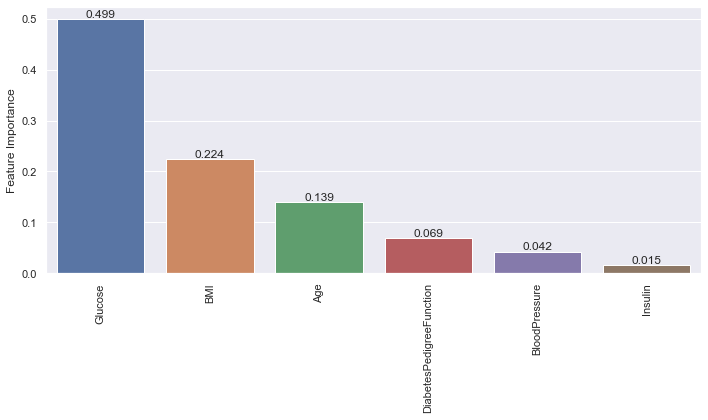

In [58]:
ax = sns.barplot(x = df_f_i2.index, y = 'Feature Importance', data = df_f_i2)
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation = 90)
plt.tight_layout()

#  Analyzing Model Complexity with Learning Curves

In [60]:
from sklearn.model_selection import validation_curve

In [61]:
train_score, test_score = validation_curve(cart_final, X, y,
                                           param_name="max_depth",
                                           param_range=range(1, 11),
                                           scoring="roc_auc",
                                           cv=10)

In [63]:
mean_train_score = np.mean(train_score, axis=1)
mean_train_score

array([0.70729413, 0.78976751, 0.83642714, 0.87502762, 0.90657681,
       0.9329937 , 0.95769197, 0.97456382, 0.98429405, 0.99024743])

In [64]:
mean_test_score = np.mean(test_score, axis=1)
mean_test_score

array([0.68127066, 0.74061681, 0.77597863, 0.77651852, 0.76901852,
       0.76218234, 0.75009259, 0.72646296, 0.71799858, 0.70029915])

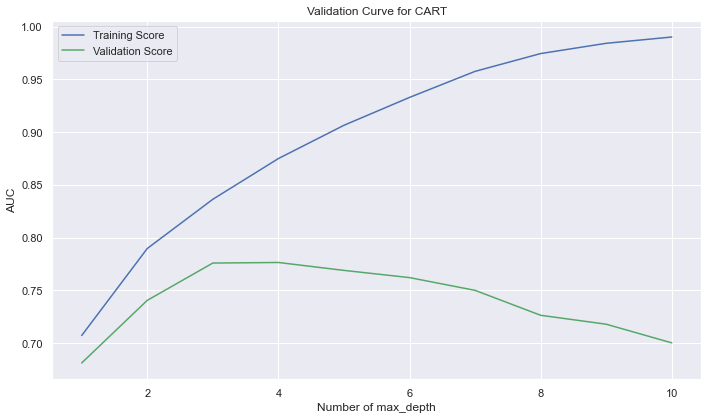

In [67]:
plt.plot(range(1, 11), mean_train_score,
         label="Training Score", color='b')

plt.plot(range(1, 11), mean_test_score,
         label="Validation Score", color='g')

plt.title("Validation Curve for CART")
plt.xlabel("Number of max_depth")
plt.ylabel("AUC")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [69]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)

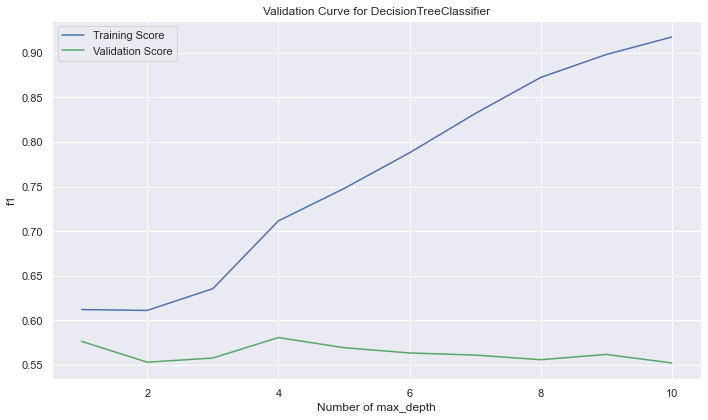

In [70]:
val_curve_params(cart_final, X, y, "max_depth", range(1, 11), scoring="f1")

In [71]:
cart_val_params = [["max_depth", range(1, 11)], ["min_samples_split", range(2, 20)]]

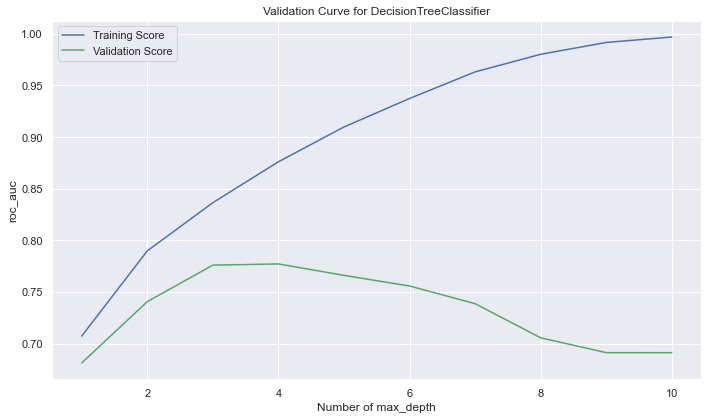

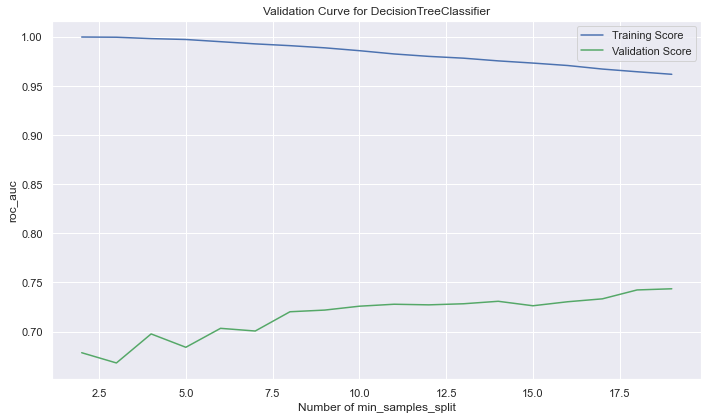

In [72]:
for i in range(len(cart_val_params)):
    val_curve_params(cart_model, X, y, cart_val_params[i][0], cart_val_params[i][1])